# NYC Accidents

## Load data

The total number of rows in the csv:

In [23]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plot

FILENAME = "lat_long_key.csv"
NUMBER_OF_ROWS = 100_000

df = pd.read_csv(FILENAME, nrows=NUMBER_OF_ROWS)
df

,latitude,longitude,uniquekey
0,40.612034,-73.942720,3734548
1,40.758564,-73.983120,3734155
2,40.667980,-73.774320,3733973
3,40.700962,-73.892456,3734125
4,40.865387,-73.893456,3733582
...,...,...,...
99995,40.794650,-73.971794,3637152
99996,40.772327,-73.945310,3639627
99997,40.778830,-73.976100,3627328
99998,40.888140,-73.892770,3642568


The total number of rows in the csv:

In [24]:
print(f"Total number of rows in csv: {len(pd.read_csv(FILENAME))}")

Total number of rows in csv: 890545


## Clean data

First the data base to be cleaned for missing or incorrect data points:

In [25]:
print(f"Minimum Latitude: {df.latitude.min()}")
print(f"Minimum Longitude: {df.longitude.min()}")
print(f"Maximum Latitude: {df.latitude.max()}")
print(f"Maximum Longitude: {df.longitude.max()}")
print()
print(f"Median Latitude: {df.latitude.median()}")
print(f"Median Longitude: {df.longitude.median()}")

Minimum Latitude: 0.0
Minimum Longitude: -201.23706
Maximum Latitude: 41.12615
Maximum Longitude: 0.0

Median Latitude: 40.72237
Median Longitude: -73.92742


In [26]:
df.describe()

,latitude,longitude,uniquekey
count,100000.000000,100000.000000,1.000000e+05
mean,40.714952,-73.938101,3.681063e+06
std,0.635841,2.468709,3.077555e+04
min,0.000000,-201.237060,3.586477e+06
25%,40.668224,-73.976170,3.654487e+06
50%,40.722370,-73.927420,3.681062e+06
75%,40.771656,-73.865180,3.707657e+06
max,41.126150,0.000000,3.735242e+06


In [38]:
latitude_median = df.latitude.median()
longitude_median = df.longitude.median()

df = df[(df.latitude > 0) & (df.latitude < 41) & (df.longitude > -74.4) & (df.longitude < -50 )]

print(f"Minimum Latitude: {df.latitude.min()}")
print(f"Minimum Longitude: {df.longitude.min()}")
print(f"Maximum Latitude: {df.latitude.max()}")
print(f"Maximum Longitude: {df.longitude.max()}")
print()
print(f"Median Latitude: {df.latitude.median()}")
print(f"Median Longitude: {df.longitude.median()}")

df.describe()

Minimum Latitude: 40.502876
Minimum Longitude: -74.251366
Maximum Latitude: 40.912884000000005
Maximum Longitude: -73.70058399999999

Median Latitude: 40.72237
Median Longitude: -73.92742


,latitude,longitude,uniquekey
count,99934.000000,99934.000000,9.993400e+04
mean,40.724711,-73.920809,3.681060e+06
std,0.079627,0.087761,3.077869e+04
min,40.502876,-74.251366,3.586477e+06
25%,40.668266,-73.976104,3.654478e+06
50%,40.722370,-73.927420,3.681056e+06
75%,40.771722,-73.865250,3.707660e+06
max,40.912884,-73.700584,3.735242e+06


## Clustering

### Extract Coordinates

In [40]:
coords = df.values[:, [0, 1]]
coords

array([[ 40.612034, -73.94272 ],
       [ 40.758564, -73.98312 ],
       [ 40.66798 , -73.77432 ],
       ...,
       [ 40.77883 , -73.9761  ],
       [ 40.88814 , -73.89277 ],
       [ 40.68115 , -74.00458 ]])

In [41]:
len(coords)

99934

## Clustering 

In [8]:
kms_per_radian = 6371.0088
epsilon = 1.1 / kms_per_radian
MINIMUM_SAMPLES = 13

db_scan = DBSCAN(eps=epsilon, metric="haversine", min_samples=MINIMUM_SAMPLES)
db_scan

DBSCAN(eps=0.00017265711514948782, metric='haversine', min_samples=13)

In [9]:
db = db_scan.fit(np.radians(coords))
db

DBSCAN(eps=0.00017265711514948782, metric='haversine', min_samples=13)

In [10]:
cluster_labels = db.labels_
print(set(cluster_labels))

{0, 1, 2, 3, -1}


In [11]:
num_clusters = len(set(cluster_labels))
print(num_clusters)

5


In [12]:
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
clusters

0    [[40.612034, -73.94272], [40.758564, -73.98312...
1    [[40.564304, -74.11596999999999], [40.530132, ...
2    [[40.6004, -73.75091], [40.587418, -73.8123], ...
3    [[40.86569, -73.80516], [40.86569, -73.80516],...
4                                                   []
dtype: object

## Visualize clusters

Size of cluster 0: 93620
Size of cluster 1: 5342
Size of cluster 2: 890
Size of cluster 3: 63
Size of cluster 4: 0
Biggest cluster size: 93620


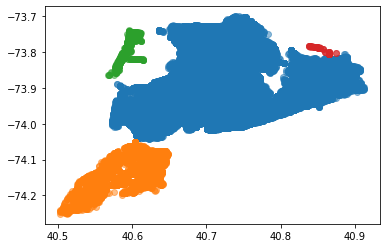

In [17]:
%matplotlib inline

for i in range(0,len(clusters)):
    print(f"Size of cluster {i}: {len(clusters[i])}")
    plot.scatter(clusters[i][:,0],clusters[i][:,1], alpha=0.5)

maxium_cluster_size=max(len(x) for x in clusters)
print(f"Biggest cluster size: {maxium_cluster_size}")

## Playing with parameters

In [71]:
%matplotlib qt

KMS_PER_RADIAN = 6371.0088
MINIMUM_SAMPLES = 20

epsilon = 0.2 / KMS_PER_RADIAN

db_scan = DBSCAN(eps=epsilon, metric="haversine", min_samples=MINIMUM_SAMPLES)
db = db_scan.fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])

for i in range(0,len(clusters)):
    print(f"Size of cluster {i}: {len(clusters[i])}")
    plot.scatter(clusters[i][:,0],clusters[i][:,1], alpha=0.1, s=3)

maxium_cluster_size=max(len(x) for x in clusters)
print(f"Biggest cluster size: {maxium_cluster_size}")

Size of cluster 0: 31866
Size of cluster 1: 1447
Size of cluster 2: 20531
Size of cluster 3: 4845
Size of cluster 4: 209
Size of cluster 5: 398
Size of cluster 6: 634
Size of cluster 7: 145
Size of cluster 8: 171
Size of cluster 9: 135
Size of cluster 10: 33
Size of cluster 11: 2251
Size of cluster 12: 224
Size of cluster 13: 129
Size of cluster 14: 1437
Size of cluster 15: 31
Size of cluster 16: 156
Size of cluster 17: 44
Size of cluster 18: 132
Size of cluster 19: 65
Size of cluster 20: 2197
Size of cluster 21: 96
Size of cluster 22: 83
Size of cluster 23: 23
Size of cluster 24: 80
Size of cluster 25: 1322
Size of cluster 26: 451
Size of cluster 27: 53
Size of cluster 28: 501
Size of cluster 29: 178
Size of cluster 30: 229
Size of cluster 31: 111
Size of cluster 32: 140
Size of cluster 33: 24
Size of cluster 34: 84
Size of cluster 35: 30
Size of cluster 36: 23
Size of cluster 37: 101
Size of cluster 38: 41
Size of cluster 39: 84
Size of cluster 40: 52
Size of cluster 41: 206
Size of 

In [55]:
coords

array([[ 40.612034, -73.94272 ],
       [ 40.758564, -73.98312 ],
       [ 40.66798 , -73.77432 ],
       ...,
       [ 40.77883 , -73.9761  ],
       [ 40.88814 , -73.89277 ],
       [ 40.68115 , -74.00458 ]])

1
1


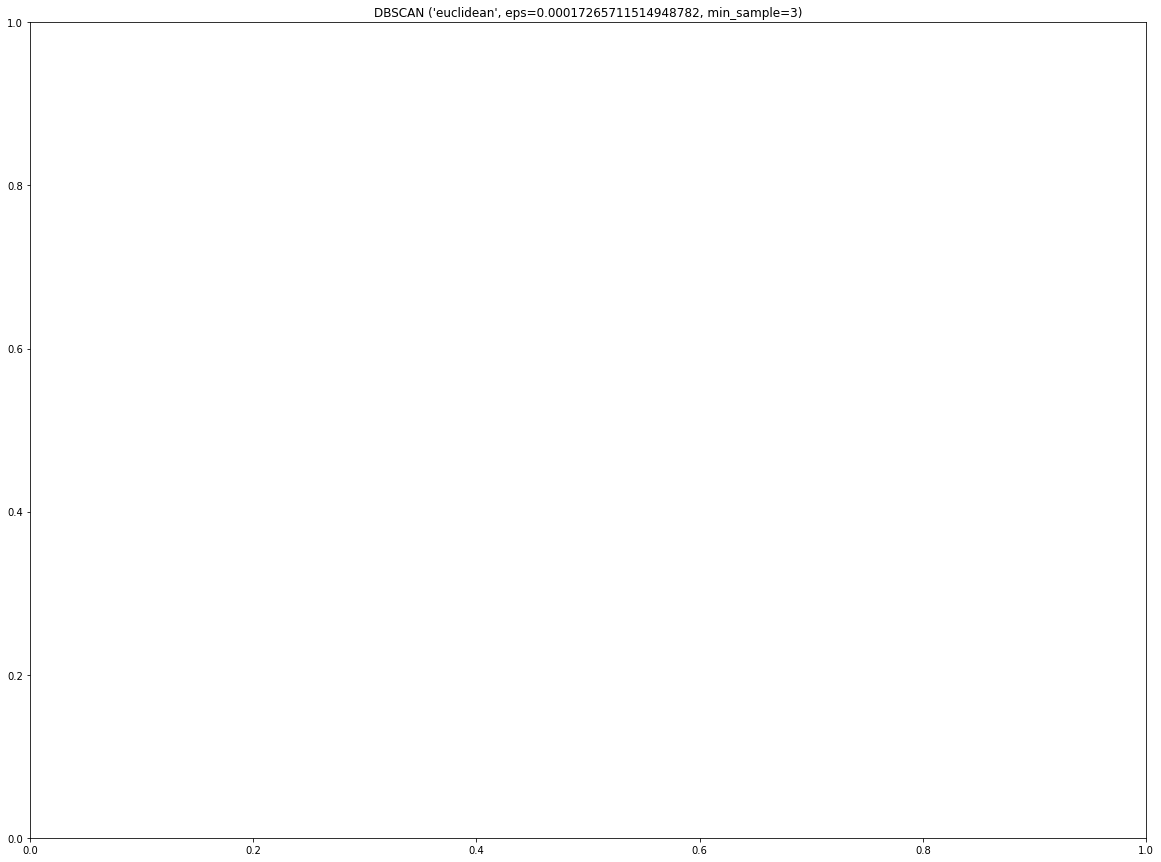

In [52]:
epsilons = [x / KMS_PER_RADIAN for x in [1.1]]
min_samples = [3]

#eps = [0.004, 0.005]   # unit: latitude/longitude
#min_sample = [3, 4, 5]

n1, n2 = len(epsilons), len(min_samples)
plt.subplots(nrows=n1, ncols=n2, figsize=(20, 15))

print(n1)
print(n2)

for i in range(n1):
    for j in range(n2):
        est = DBSCAN(eps=epsilons[i], min_samples=min_samples[j], metric="haversine").fit(coords)
        ax = plt.subplot(n1, n2, n2*i+j+1)
        ax.set_title(f"DBSCAN ('euclidean', eps={epsilons[i]}, min_sample={min_samples[j]})")